# Data Transformation using Python Pandas

## Import dependencies

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Display all columns (pandas will collapse some columns if we don't set this option)
pd.set_option('display.max_columns', None)

## Import files

In [3]:
nationals_df = pd.read_csv("2019_washington_nationals")
astros_df = pd.read_csv("2019_houston_astros")

## Data Cleaning

In [4]:
# Delete non player roles using df index and .drop method
nationals = nationals_df.drop([8,22,52,53,54,55,56])

## Data Exploration

In [5]:
# Use the info method to inspect the datatypes for each column
nationals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 51
Data columns (total 28 columns):
Rk      50 non-null object
Pos     50 non-null object
Name    50 non-null object
Age     50 non-null object
G       50 non-null object
PA      50 non-null object
AB      50 non-null object
R       50 non-null object
H       50 non-null object
2B      50 non-null object
3B      50 non-null object
HR      50 non-null object
RBI     50 non-null object
SB      50 non-null object
CS      50 non-null object
BB      50 non-null object
SO      50 non-null object
BA      36 non-null object
OBP     36 non-null object
SLG     36 non-null object
OPS     36 non-null object
OPS+    36 non-null object
TB      50 non-null object
GDP     50 non-null object
HBP     50 non-null object
SH      50 non-null object
SF      50 non-null object
IBB     50 non-null object
dtypes: object(28)
memory usage: 11.3+ KB


## Relabel columns for readibility

#### Step 1: Create a dictionary the key is the original name, and the value is the new name

In [6]:
 nat_col_names = {"Rk":"Rank", "Pos":"Position","G":"Games_Played", "PA":"Plate_Apperance", "AB":"At_Bat", "R":"Runs", "H":"Hits", "SB":"Stolen_Bases","CS":"Caugt_Stealing","BB":"Base_Balls", "SO":"Strike_Outs","BA":"Hits_at_Bat", "TB":"Total_Bases", "HBP":"Hits_by_Pitch"}

#### Step 2: use the rename method and the dictionary name to assign the new column names to the dataframe

In [7]:
nationals = nationals.rename(columns=nat_col_names)

## Memory Reduction

In [8]:
# Inspect current data types for each column using dtypes
nationals.dtypes

Rank               object
Position           object
Name               object
Age                object
Games_Played       object
Plate_Apperance    object
At_Bat             object
Runs               object
Hits               object
2B                 object
3B                 object
HR                 object
RBI                object
Stolen_Bases       object
Caugt_Stealing     object
Base_Balls         object
Strike_Outs        object
Hits_at_Bat        object
OBP                object
SLG                object
OPS                object
OPS+               object
Total_Bases        object
GDP                object
Hits_by_Pitch      object
SH                 object
SF                 object
IBB                object
dtype: object

### Find memory usage with memory_usage method

In [9]:
nationals_mem = nationals.memory_usage(deep=True)
nationals_mem

Index               400
Rank               3013
Position           3181
Name               3502
Age                2950
Games_Played       3056
Plate_Apperance    3118
At_Bat             3132
Runs               3198
Hits               3180
2B                 3216
3B                 3300
HR                 3230
RBI                3204
Stolen_Bases       3272
Caugt_Stealing     3300
Base_Balls         3203
Strike_Outs        3145
Hits_at_Bat        2644
OBP                2644
SLG                2644
OPS                2645
OPS+               2614
Total_Bases        3177
GDP                3258
Hits_by_Pitch      3279
SH                 3300
SF                 3300
IBB                3300
dtype: int64

### Reduce memory usage by changing datatypes

In [10]:
# Convert columns that are categorical using astype method
nationals["Position"] = nationals["Position"].astype('category')

#### Astype method only works on a single column, to change multiple columns in one code block, use a for loop.

#### Step1: Create lists of columns by the final data type

In [11]:
# These columns are categorical and strings
non_num_cols = ['Position','Name']

In [12]:
# These columns have missin values, and decimals
float_cols = ['Hits_at_Bat','OBP','SLG','OPS','OPS+']

In [13]:
# Combine all non integer columns into a single list
non_int_cols = non_num_cols + float_cols

In [14]:
# Use a list comprehension to generate a list of columns that contains integer values
# int_cols = ["Age","Base_Balls", "Games_Played", "Plate_Apperance","At_Bat","Runs","Hits","2B","Strike_Outs"]
int_cols = [col for col in nationals.columns if col not in non_int_cols]

#### Step2: Use a for loop to change the data types of multiple columns

In [15]:
# Convert into integer
for col in int_cols:
    nationals[col] = nationals[col].astype('int64')

In [16]:
# Converts columns into floats
for col in float_cols:
    nationals[col] = nationals[col].astype('float')

In [17]:
# Confirm datatype changes
nationals.dtypes

Rank                  int64
Position           category
Name                 object
Age                   int64
Games_Played          int64
Plate_Apperance       int64
At_Bat                int64
Runs                  int64
Hits                  int64
2B                    int64
3B                    int64
HR                    int64
RBI                   int64
Stolen_Bases          int64
Caugt_Stealing        int64
Base_Balls            int64
Strike_Outs           int64
Hits_at_Bat         float64
OBP                 float64
SLG                 float64
OPS                 float64
OPS+                float64
Total_Bases           int64
GDP                   int64
Hits_by_Pitch         int64
SH                    int64
SF                    int64
IBB                   int64
dtype: object

#### Save updated records for memory reduction

In [18]:
updated_nationals_mem = nationals.memory_usage(deep=True)

#### Create a dataframe to compare memory reduction

In [19]:
# Create a dataframe using concat method
mem_df = pd.concat([nationals_mem, updated_nationals_mem], axis=1)

In [20]:
# Labels columns
mem_df.columns = ['Memory Pre Change', 'Memory Post Change']

In [21]:
# Create two new calculated columns, the absolute and the percent change
mem_df['Absolute Change'] = mem_df['Memory Post Change'] - mem_df['Memory Pre Change']
mem_df["Percent Change"] = ((mem_df['Memory Post Change'] - mem_df['Memory Pre Change'])/mem_df['Memory Pre Change'])

#### Style table for readability

In [22]:
# Function to change negative values to red
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [23]:
# Style column with negative values and percentage
format_dict = {'Percent Change':'{:.2%}'}

mem_df.style.format(format_dict).applymap(color_negative_red)

,Memory Pre Change,Memory Post Change,Absolute Change,Percent Change
Index,400,400,0,0.00%
Rank,3013,400,-2613,-86.72%
Position,3181,1092,-2089,-65.67%
Name,3502,3502,0,0.00%
Age,2950,400,-2550,-86.44%
Games_Played,3056,400,-2656,-86.91%
Plate_Apperance,3118,400,-2718,-87.17%
At_Bat,3132,400,-2732,-87.23%
Runs,3198,400,-2798,-87.49%
Hits,3180,400,-2780,-87.42%


## Visual Memory Reduction using a Bar Plot

#### Organize variables that will be used in the bar plot

In [24]:
# Labels: Prepare a list of column name labels
labels = list(nationals.columns.values)

# Data values
post_memory = list(updated_nationals_mem.values)
post_memory = post_memory[1:] #omits the index value because the labels list does not include "index"
pre_memory = list(nationals_mem.values)
pre_memory = pre_memory[1:] #omits the index value because the labels list does not include "index"

In [25]:
# Confirm that the number of labels and the number of values are equal
# Otherwise, the bar plots will not be generated
print (len(labels) == len(pre_memory),
len(labels) == len(post_memory))

True True


#### Label location and bar width

In [26]:
# the label locations
x = np.arange(len(labels))

# the width of the bars
width = 0.35  

#### Figure plot code

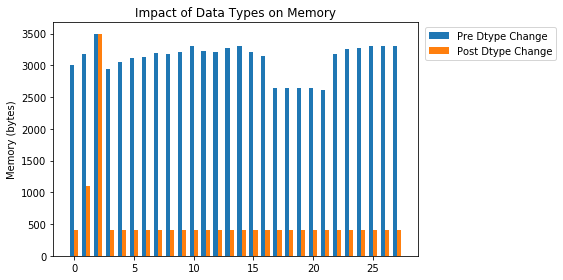

In [27]:
# Creates just a figure and only one subplot
fig, ax = plt.subplots()
# Code for the bars, one per group
rects1 = ax.bar(x - width/2, pre_memory, width, label='Pre Dtype Change') 
rects2 = ax.bar(x + width/2, post_memory, width, label='Post Dtype Change')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Memory (bytes)')
ax.set_title('Impact of Data Types on Memory')

# To set the legend box outside of the plot
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
# bboxbbox_to_anchor anchors legend box, bboxbbox_to_anchor(x, y)
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=False, ncol=1)

fig.tight_layout()
plt.show()